In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import minimize
import pyreadr
import os
import time
from scipy.stats import norm
import copy
import warnings
import utils
import regression_fit
import pickle
from importlib import reload
reload(utils)
reload(regression_fit)
from utils import *
from regression_fit import *

home = os.getcwd()

## Dataset

In [18]:
GroupA = pyreadr.read_r(home + '\\Other_data\\GroupA.rda')
GroupA_df = pd.DataFrame(list(GroupA.values())[0])

GroupB = pyreadr.read_r(home + '\\Other_data\\GroupB.rda')
GroupB_df = pd.DataFrame(list(GroupB.values())[0])

GroupC = pyreadr.read_r(home + '\\Other_data\\GroupC.rda')
GroupC_df = pd.DataFrame(list(GroupC.values())[0])

GroupD = pyreadr.read_r(home + '\\Other_data\\GroupD.rda')
GroupD_df = pd.DataFrame(list(GroupD.values())[0])

GroupE = pyreadr.read_r(home + '\\Other_data\\GroupE.rda')
GroupE_df = pd.DataFrame(list(GroupE.values())[0])

GroupF = pyreadr.read_r(home + '\\Other_data\\GroupF.rda')
GroupF_df = pd.DataFrame(list(GroupF.values())[0])

GroupG = pyreadr.read_r(home + '\\Other_data\\GroupG.rda')
GroupG_df = pd.DataFrame(list(GroupG.values())[0])

GroupH = pyreadr.read_r(home + '\\Other_data\\GroupH.rda')
GroupH_df = pd.DataFrame(list(GroupH.values())[0])

GroupJ = pyreadr.read_r(home + '\\Other_data\\GroupJ.rda')
GroupJ_df = pd.DataFrame(list(GroupJ.values())[0])

GroupH = pyreadr.read_r(home + '\\Other_data\\GroupH.rda')
GroupH_df = pd.DataFrame(list(GroupH.values())[0])

GroupJ = pyreadr.read_r(home + '\\Other_data\\GroupJ.rda')
GroupJ_df = pd.DataFrame(list(GroupJ.values())[0])

GroupK = pyreadr.read_r(home + '\\Other_data\\GroupK.rda')
GroupK_df = pd.DataFrame(list(GroupK.values())[0])

GroupL = pyreadr.read_r(home + '\\Other_data\\GroupL.rda')
GroupL_df = pd.DataFrame(list(GroupL.values())[0])

GroupM = pyreadr.read_r(home + '\\Other_data\\GroupM.rda')
GroupM_df = pd.DataFrame(list(GroupM.values())[0])

GroupN = pyreadr.read_r(home + '\\Other_data\\GroupN.rda')
GroupN_df = pd.DataFrame(list(GroupN.values())[0])

GroupP = pyreadr.read_r(home + '\\Other_data\\GroupP.rda')
GroupP_df = pd.DataFrame(list(GroupP.values())[0])

In [20]:
regions_df = [GroupA_df, GroupB_df, GroupC_df, GroupD_df, GroupE_df, GroupF_df, GroupG_df, GroupH_df, GroupJ_df, GroupK_df,
             GroupL_df, GroupM_df, GroupN_df, GroupP_df]

# Indexes of the test set corresponding to the beginning of 2020 and of 2021 (required to compute the error metrics)
idx_2020 = 17516
idx_2021 = 35104

In [21]:
# Adding lagged net-load values: columns y0_96, y0_336, diff_96, diff_336 to the dataset of each region
for df in regions_df:   
    df = add_autoregressive_features(df)

regions = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P']
train_set = {}
test_set = {}

# The dataset of each region is split in train and test set
for (reg, df) in zip(regions, regions_df):
    # Train set
    train_set[reg] = df[720:87440].reset_index(drop=True)
    #Test set
    test_set[reg] = df[87440:].reset_index(drop=True)

# Descriptive statistics

Two week moving average of net-load by GSP group 

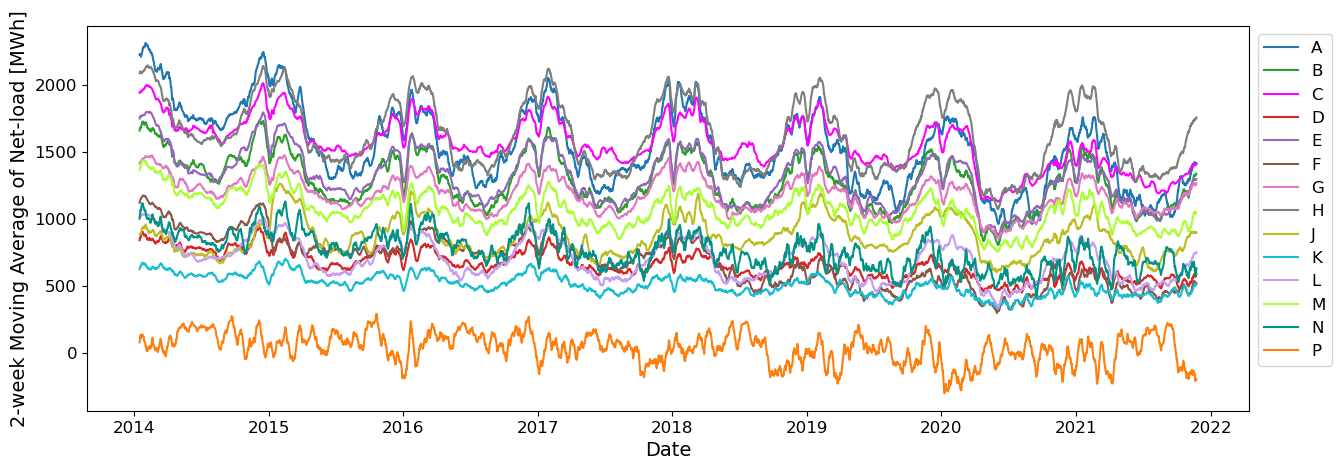

In [28]:
custom_colors = ['tab:blue', 'tab:green', 'magenta', 'tab:red', 
                 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 
                 'tab:olive', 'tab:cyan', 'xkcd:lavender', 'xkcd:lime', 
                 'xkcd:teal', 'tab:orange']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(1,1, figsize=(15,5))

for (reg,df) in zip(regions, regions_df):
    wma4 = df["node"].rolling(window=672).mean()
    axs.plot(df["targetTime"], wma4, '-', label=reg)
    
#axs.set_title("2-week Moving Average of Net-load by GSP group")
axs.set_xlabel("Date", fontsize=14);
axs.set_ylabel("2-week Moving Average of Net-load [MWh]", fontsize=14);
axs.legend(loc='upper left', bbox_to_anchor=(1, 1));
fig.savefig("Figures/2week-ma-allGroups.jpg")

## Plot on 27-01-2014

Net-load values on 27-01-2014 per GSP group

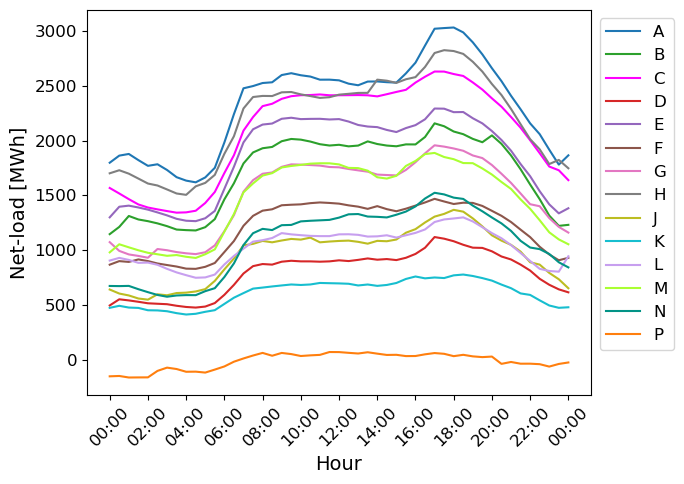

In [31]:
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 12})
for (reg,df) in zip(regions, regions_df):
    plt.plot(df["targetTime"][1200:1249], df["node"][1200:1249], '-', label=reg)
    
plt.xticks(df["targetTime"][1200:1249][::4], [date.strftime('%H:%M') for date in df['targetTime'][1200:1249][::4]])
plt.xticks(rotation=45)
plt.xlabel("Hour", fontsize=14);
plt.ylabel("Net-load [MWh]", fontsize=14);
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

plt.tight_layout()

plt.savefig("Figures/hour-netLoad-allGroups.jpg")

# Solar capacity by GSP group

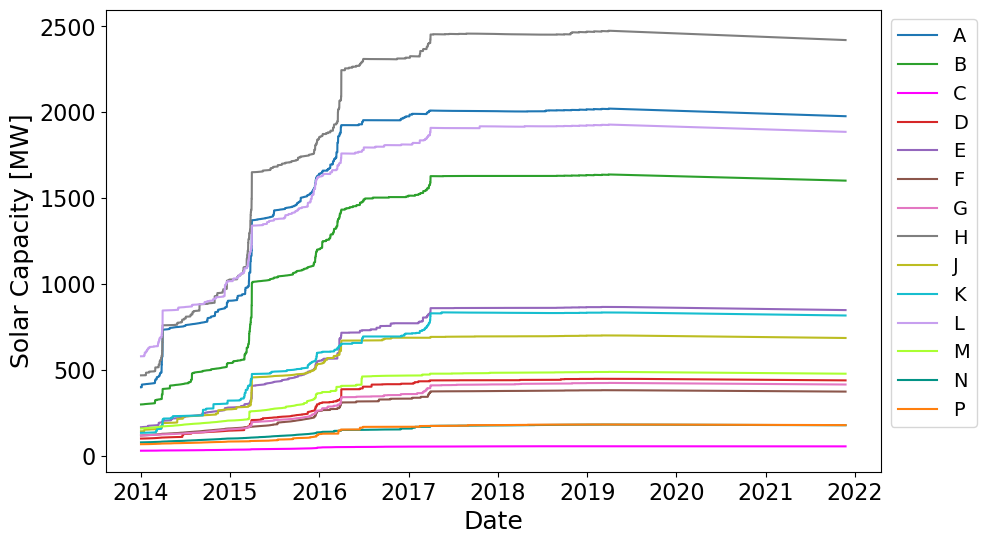

In [44]:
custom_colors = ['tab:blue', 'tab:green', 'magenta', 'tab:red', 
                 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 
                 'tab:olive', 'tab:cyan', 'xkcd:lavender', 'xkcd:lime', 
                 'xkcd:teal', 'tab:orange']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1,1, figsize=(10,6))

for (reg,df) in zip(regions, regions_df):
    axs.plot(df["targetTime"], df["SolarCap"], '-', label=reg)
    
axs.set_xlabel("Date", fontsize=18);
axs.set_ylabel("Solar Capacity [MW]", fontsize=18);
axs.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14);
fig.savefig("Figures\solarCap.jpg")

# National Embedded Wind Capacity

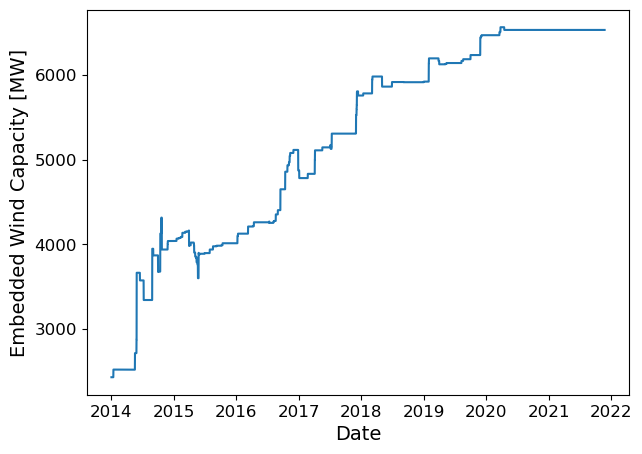

In [47]:
custom_colors = ['tab:blue', 'tab:green', 'magenta', 'tab:red', 
                 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 
                 'tab:olive', 'tab:cyan', 'xkcd:lavender', 'xkcd:lime', 
                 'xkcd:teal', 'tab:orange']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(1,1, figsize=(7,5))

axs.plot(GroupC_df["targetTime"], GroupC_df["EMBEDDED_WIND_CAPACITY"], '-')
    
axs.set_xlabel("Date", fontsize=14);
axs.set_ylabel("Embedded Wind Capacity [MW]", fontsize=14);
fig.savefig("Figures/windCap.jpg")

# LM-Point Model 
The linear regression model is trained on the training set of each GSP Group

Target Variable: 7-day differenced net-load 

In [55]:
params_df = {}
for (reg, df) in zip(regions, regions_df):
    St_train = regression_feature_matrix(train_set[reg])
    model = sm.OLS(train_set[reg]["diff_336"], St_train)
    results = model.fit()   
    params_df[reg] = results.params # Optimal parameters obtained with the regression

    St = regression_feature_matrix(df)
    
    # Computation of the forecasts on the entire dataset (included the test set) + adding net-load value of 7 days before
    df['y0_diff_OLS'] = np.array(df['y0_336']) + St@params_df[reg]
    df['res_diff_OLS'] = np.array(df['node']) - np.array(df['y0_diff_OLS'])

for (reg, df) in zip(regions, regions_df):
    # Train set
    train_set[reg] = df[720:87440].reset_index(drop=True)
    # Test set
    test_set[reg] = df[87440:].reset_index(drop=True)

## Evaluation Metrics of the LM-Point model on the test set

In [58]:
idx_2020 = 17516
idx_2021 = 35104

y_mat = np.zeros((len(test_set['A']),len(regions)))
for i,reg in enumerate(regions):
    y_mat[:,i] = test_set[reg]['node']
    
yhat_seasonality_diff_OLS = np.zeros((len(test_set['A']),len(regions)))
    
for i, reg in enumerate(regions):
    yhat_seasonality_diff_OLS[:,i] = test_set[reg]['y0_diff_OLS']
    
print("LM-Point model")
print("\nnRMSE in 2019: ", nRMSE(y_mat[:idx_2020], yhat_seasonality_diff_OLS[:idx_2020]))
print("nRMSE in 2020: ", nRMSE(y_mat[idx_2020:idx_2021], yhat_seasonality_diff_OLS[idx_2020:idx_2021]))
print("nRMSE in 2021: ", nRMSE(y_mat[idx_2021:], yhat_seasonality_diff_OLS[idx_2021:]))

print("\nnMAE in 2019: ", nMAE(y_mat[:idx_2020], yhat_seasonality_diff_OLS[:idx_2020]))
print("nMAE in 2020: ", nMAE(y_mat[idx_2020:idx_2021], yhat_seasonality_diff_OLS[idx_2020:idx_2021]))
print("nMAE in 2021: ", nMAE(y_mat[idx_2021:], yhat_seasonality_diff_OLS[idx_2021:]))


LM-Point model

nRMSE on 2019:  0.3050215396727011
nRMSE on 2020:  0.3483794112095083
nRMSE on 2021:  0.36033316636389734

nMAE on 2019:  0.27447731990158275
nMAE on 2020:  0.32012442949528136
nMAE on 2021:  0.3358565755414903


# Kalman adaptation of the LM-Point model

## Static Kalman LM

Static Kalman LM model is trained on the training set of each region (target variable is the 7-days differenced net-load)

In [63]:
kf_static_diff = {}

for reg in regions:
    print(reg)
    St_train = regression_feature_matrix(train_set[reg])
    kf = Kalman_Filter(GAM=False,params=params_df[reg])
    kf.fit(St_train, train_set[reg]['diff_336'])
    kf_static_diff[reg] = kf

y_Kalman_static_diff = {}

for reg in regions:
    St_test = regression_feature_matrix(test_set[reg])
    # Target variable is the 7-days differenced net-load
    df_kf = test_set[reg][['targetTime','diff_336']]
    y_Kalman_static_diff[reg] = {}
    predictions, _ = kf_static_diff[reg].predict(St_test, df_kf, delay=True) 
    # The predictions are split by year and the net-load value of 7 days before is added back
    y_Kalman_static_diff[reg]['2019'] = test_set[reg]['y0_336'].iloc[:idx_2020] + predictions[:idx_2020]
    y_Kalman_static_diff[reg]['2020'] = test_set[reg]['y0_336'].iloc[idx_2020:idx_2021] + predictions[idx_2020:idx_2021]
    y_Kalman_static_diff[reg]['2021'] = test_set[reg]['y0_336'].iloc[idx_2021:] + predictions[idx_2021:]
    

A
B
C
D
E
F
G
H
J
K
L
M
N
P


## Evaluation of the Static Kalman LM on the test set

In [65]:
y_mat = np.zeros((len(test_set['A']),len(regions)))
for i,reg in enumerate(regions):
    y_mat[:,i] = test_set[reg]['node']
    
yhat_staticKF_diff_mat = np.zeros((len(test_set['A']),len(regions)))


for i,reg in enumerate(regions):
    yhat_staticKF_diff_mat[:idx_2020,i] = y_Kalman_static_diff[reg]['2019']
    yhat_staticKF_diff_mat[idx_2020:idx_2021,i] = y_Kalman_static_diff[reg]['2020']
    yhat_staticKF_diff_mat[idx_2021:,i] = y_Kalman_static_diff[reg]['2021']


print("\nnRMSE LM-Point model in 2019: ", nRMSE(y_mat[:idx_2020], yhat_seasonality_diff_OLS[:idx_2020]))
print("nRMSE LM-Point model in 2020: ", nRMSE(y_mat[idx_2020:idx_2021], yhat_seasonality_diff_OLS[idx_2020:idx_2021]))
print("nRMSE LM-Point model in 2021: ", nRMSE(y_mat[idx_2021:], yhat_seasonality_diff_OLS[idx_2021:]))

print("\nnMAE LM-Point model in 2019: ", nMAE(y_mat[:idx_2020], yhat_seasonality_diff_OLS[:idx_2020]))
print("nMAE LM-Point model in 2020: ", nMAE(y_mat[idx_2020:idx_2021], yhat_seasonality_diff_OLS[idx_2020:idx_2021]))
print("nMAE LM-Point model in 2021: ", nMAE(y_mat[idx_2021:], yhat_seasonality_diff_OLS[idx_2021:]))

print("\n\nnRMSE Static Kalman LM in 2019: ", nRMSE(y_mat[:idx_2020], yhat_staticKF_diff_mat[:idx_2020]))
print("nRMSE Static Kalman LM in 2020: ", nRMSE(y_mat[idx_2020:idx_2021], yhat_staticKF_diff_mat[idx_2020:idx_2021]))
print("nRMSE Static Kalman LM in 2021: ", nRMSE(y_mat[idx_2021:], yhat_staticKF_diff_mat[idx_2021:]))

print("\nnMAE Static Kalman LM in 2019: ", nMAE(y_mat[:idx_2020], yhat_staticKF_diff_mat[:idx_2020]))
print("nMAE Static Kalman LM in 2020: ", nMAE(y_mat[idx_2020:idx_2021], yhat_staticKF_diff_mat[idx_2020:idx_2021]))
print("nMAE Static Kalman LM in 2021: ", nMAE(y_mat[idx_2021:], yhat_staticKF_diff_mat[idx_2021:]))



nRMSE LM-Point model on 2019:  0.3050215396727011
nRMSE LM-Point model on 2020:  0.3483794112095083
nRMSE LM-Point model on 2021:  0.36033316636389734

nMAE LM-Point model on 2019:  0.27447731990158275
nMAE LM-Point model on 2020:  0.32012442949528136
nMAE LM-Point model on 2021:  0.3358565755414903


nRMSE Static Kalman LM on 2019:  0.30243089395253003
nRMSE Static Kalman LM on 2020:  0.3325773625800012
nRMSE Static Kalman LM on 2021:  0.3395564480121649

nMAE Static Kalman LM on 2019:  0.2712281642398365
nMAE Static Kalman LM on 2020:  0.30244865379844726
nMAE Static Kalman LM on 2021:  0.3156080455985653


# Dynamic Kalman LM

Target variable: 7-days differenced net-load

Hyperparameters chosen with the Reduced Grid Search (II) method which uses the State Variance Initialization Matrix

In [72]:
kf_dynamic_diff = {}

q_list = [1e-10,1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17, 1e-18, 1e-19]


for reg in regions:
    print(reg)
    St_train = regression_feature_matrix(train_set[reg])
    
    # HYPERPARAMETERS SELECTION
    # Computation of the standard deviation of the state vector's components on the training set of the Static Kalman LM
    std_static = np.std(kf_static_diff[reg].theta_mat[15000:],axis=0)
    
    optim = Q_optimization(St_train, train_set[reg][["targetTime", "diff_336"]],GAM=False,params=params_df[reg])
    Q, sigma, P, theta1 = optim.grid_search_reduced_likelihood(q_list=q_list, std_static=std_static) 
    
    # Model Training
    kf = Kalman_Filter(GAM=False, Q=Q, sigma=sigma, P=P, theta1=theta1, params=params_df[reg])
    kf.fit(St_train, train_set[reg]['diff_336'])
    kf_dynamic_diff[reg] = kf
    
y_Kalman_dynamic_diff = {}

for reg in regions:
    St_test = regression_feature_matrix(test_set[reg])
    # Target variable is the 7days differenced net-load
    df_kf = test_set[reg][['targetTime','diff_336']]
    y_Kalman_dynamic_diff[reg] = {}
    # Predictions are computed and split by year, then the net-load value of 7 days before is added back
    predictions, _ = kf_dynamic_diff[reg].predict(St_test, df_kf, delay=True) 
    y_Kalman_dynamic_diff[reg]['2019'] = test_set[reg]['y0_336'].iloc[:idx_2020] + predictions[:idx_2020] 
    y_Kalman_dynamic_diff[reg]['2020'] = test_set[reg]['y0_336'].iloc[idx_2020:idx_2021] + predictions[idx_2020:idx_2021]
    y_Kalman_dynamic_diff[reg]['2021'] = test_set[reg]['y0_336'].iloc[idx_2021:] + predictions[idx_2021:]

A
1e-10
-567533.7230234513
1e-11
-559757.2281409036
1e-12
-553708.6697636544
1e-13
-547752.1975212039
1e-14
-562321.7712131836
1e-15
-545160.988310161
1e-16
-545139.3641769844
1e-17
-545651.7627605465
1e-18
-546236.6223420533
1e-19
-546333.9070636586
Optimal q:  1.4935005929599021e-12
Optimal sigma:  122.20886191107019
Maximum likelihood achieved:  -545139.3641769844
B
1e-10
-528758.284653405
1e-11
-524692.8344623189
1e-12
-1168162.3965712127
1e-13
-937094.7002436845
1e-14
-521960.7121952327
1e-15
-522383.1658027965
1e-16
-525181.1225821413
1e-17
-522782.894878609
1e-18
-522713.5981165515
1e-19
-523120.49552033126
Optimal q:  8.699746319563079e-11
Optimal sigma:  93.27243065109367
Maximum likelihood achieved:  -521960.7121952327
C
1e-10
-997775.507024376
1e-11
-1175586.0577433319
1e-12
-1091306.8627075683
1e-13
-496608.66687429027
1e-14
-490705.86762752465
1e-15
-613559.6433364035
1e-16
-490994.0024880363
1e-17
-491951.2542055932
1e-18
-491895.0138056011
1e-19
-491877.45542190556
Optim

## Evaluation of the Dynamic KF on the test set

In [73]:
yhat_dynamicKF_diff_mat = np.zeros((len(test_set['A']),len(regions)))

for i,reg in enumerate(regions):
    yhat_dynamicKF_diff_mat[:idx_2020,i] = y_Kalman_dynamic_diff[reg]['2019']
    yhat_dynamicKF_diff_mat[idx_2020:idx_2021,i] = y_Kalman_dynamic_diff[reg]['2020']
    yhat_dynamicKF_diff_mat[idx_2021:,i] = y_Kalman_dynamic_diff[reg]['2021']


In [78]:
print("\nnRMSE LM-Point model in 2019: ", nRMSE(y_mat[:idx_2020], yhat_seasonality_diff_OLS[:idx_2020]))
print("nRMSE LM-Point model in 2020: ", nRMSE(y_mat[idx_2020:idx_2021], yhat_seasonality_diff_OLS[idx_2020:idx_2021]))
print("nRMSE LM-Point model in 2021: ", nRMSE(y_mat[idx_2021:], yhat_seasonality_diff_OLS[idx_2021:]))

print("\nnMAE LM-Point model in 2019: ", nMAE(y_mat[:idx_2020], yhat_seasonality_diff_OLS[:idx_2020]))
print("nMAE LM-Point model in 2020: ", nMAE(y_mat[idx_2020:idx_2021], yhat_seasonality_diff_OLS[idx_2020:idx_2021]))
print("nMAE LM-Point model in 2021: ", nMAE(y_mat[idx_2021:], yhat_seasonality_diff_OLS[idx_2021:]))

print("\n\nnRMSE Static Kalman LM in 2019: ", nRMSE(y_mat[:idx_2020], yhat_staticKF_diff_mat[:idx_2020]))
print("nRMSE Static Kalman LM in 2020: ", nRMSE(y_mat[idx_2020:idx_2021], yhat_staticKF_diff_mat[idx_2020:idx_2021]))
print("nRMSE Static Kalman LM in 2021: ", nRMSE(y_mat[idx_2021:], yhat_staticKF_diff_mat[idx_2021:]))

print("\nnMAE Static Kalman LM in 2019: ", nMAE(y_mat[:idx_2020], yhat_staticKF_diff_mat[:idx_2020]))
print("nMAE Static Kalman LM in 2020: ", nMAE(y_mat[idx_2020:idx_2021], yhat_staticKF_diff_mat[idx_2020:idx_2021]))
print("nMAE Static Kalman LM in 2021: ", nMAE(y_mat[idx_2021:], yhat_staticKF_diff_mat[idx_2021:]))

print("\n\nnRMSE Dynamic Kalman LM in 2019: ", nRMSE(y_mat[:idx_2020], yhat_dynamicKF_diff_mat[:idx_2020]))
print("nRMSE Dynamic Kalman LM in 2020: ", nRMSE(y_mat[idx_2020:idx_2021], yhat_dynamicKF_diff_mat[idx_2020:idx_2021]))
print("nRMSE Dynamic Kalman LM in 2021: ", nRMSE(y_mat[idx_2021:], yhat_dynamicKF_diff_mat[idx_2021:]))

print("\nnMAE Dynamic Kalman LM in 2019: ", nMAE(y_mat[:idx_2020], yhat_dynamicKF_diff_mat[:idx_2020]))
print("nMAE Dynamic Kalman LM in 2020: ", nMAE(y_mat[idx_2020:idx_2021], yhat_dynamicKF_diff_mat[idx_2020:idx_2021]))
print("nMAE Dynamic Kalman LM in 2021: ", nMAE(y_mat[idx_2021:], yhat_dynamicKF_diff_mat[idx_2021:]))



nRMSE LM-Point model in 2019:  0.3050215396727011
nRMSE LM-Point model in 2020:  0.3483794112095083
nRMSE LM-Point model in 2021:  0.36033316636389734

nMAE LM-Point model in 2019:  0.27447731990158275
nMAE LM-Point model in 2020:  0.32012442949528136
nMAE LM-Point model in 2021:  0.3358565755414903


nRMSE Static Kalman LM in 2019:  0.30243089395253003
nRMSE Static Kalman LM in 2020:  0.3325773625800012
nRMSE Static Kalman LM in 2021:  0.3395564480121649

nMAE Static Kalman LM in 2019:  0.2712281642398365
nMAE Static Kalman LM in 2020:  0.30244865379844726
nMAE Static Kalman LM in 2021:  0.3156080455985653


nRMSE Dynamic Kalman LM in 2019:  0.30019414608385553
nRMSE Dynamic Kalman LM in 2020:  0.3218548297996409
nRMSE Dynamic Kalman LM in 2021:  0.3305557445560726

nMAE Dynamic Kalman LM in 2019:  0.2681585752090411
nMAE Dynamic Kalman LM in 2020:  0.29234188129726474
nMAE Dynamic Kalman LM in 2021:  0.3054465103133087


# Appendix Tables 

Importing GAM-Point model forecasts from R

In [80]:
Y_GAM_R_bam = {}

GroupA_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupA_GAM_R_bam.rda')
y_GAM_R_A = pd.DataFrame(list(GroupA_R.values())[0])
Y_GAM_R_bam["A"] = np.array(y_GAM_R_A).flatten()

GroupB_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupB_GAM_R_bam.rda')
y_GAM_R_B = pd.DataFrame(list(GroupB_R.values())[0])
Y_GAM_R_bam["B"] = np.array(y_GAM_R_B).flatten()

GroupC_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupC_GAM_R_bam.rda')
y_GAM_R_C = pd.DataFrame(list(GroupC_R.values())[0])
Y_GAM_R_bam["C"] = np.array(y_GAM_R_C).flatten()

GroupD_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupD_GAM_R_bam.rda')
y_GAM_R_D = pd.DataFrame(list(GroupD_R.values())[0])
Y_GAM_R_bam["D"] = np.array(y_GAM_R_D).flatten()

GroupE_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupE_GAM_R_bam.rda')
y_GAM_R_E = pd.DataFrame(list(GroupE_R.values())[0])
Y_GAM_R_bam["E"] = np.array(y_GAM_R_E).flatten()

GroupF_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupF_GAM_R_bam.rda')
y_GAM_R_F = pd.DataFrame(list(GroupF_R.values())[0])
Y_GAM_R_bam["F"] = np.array(y_GAM_R_F).flatten()

GroupG_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupG_GAM_R_bam.rda')
y_GAM_R_G = pd.DataFrame(list(GroupG_R.values())[0])
Y_GAM_R_bam["G"] = np.array(y_GAM_R_G).flatten()

GroupH_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupH_GAM_R_bam.rda')
y_GAM_R_H = pd.DataFrame(list(GroupH_R.values())[0])
Y_GAM_R_bam["H"] = np.array(y_GAM_R_H).flatten()

GroupJ_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupJ_GAM_R_bam.rda')
y_GAM_R_J = pd.DataFrame(list(GroupJ_R.values())[0])
Y_GAM_R_bam["J"] = np.array(y_GAM_R_J).flatten()

GroupH_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupH_GAM_R_bam.rda')
y_GAM_R_H = pd.DataFrame(list(GroupH_R.values())[0])
Y_GAM_R_bam["H"] = np.array(y_GAM_R_H).flatten()

GroupJ_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupJ_GAM_R_bam.rda')
y_GAM_R_J = pd.DataFrame(list(GroupJ_R.values())[0])
Y_GAM_R_bam["J"] = np.array(y_GAM_R_J).flatten()

GroupK_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupK_GAM_R_bam.rda')
y_GAM_R_K = pd.DataFrame(list(GroupK_R.values())[0])
Y_GAM_R_bam["K"] = np.array(y_GAM_R_K).flatten()

GroupL_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupL_GAM_R_bam.rda')
y_GAM_R_L = pd.DataFrame(list(GroupL_R.values())[0])
Y_GAM_R_bam["L"] = np.array(y_GAM_R_L).flatten()

GroupM_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupM_GAM_R_bam.rda')
y_GAM_R_M = pd.DataFrame(list(GroupM_R.values())[0])
Y_GAM_R_bam["M"] = np.array(y_GAM_R_M).flatten()

GroupN_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupN_GAM_R_bam.rda')
y_GAM_R_N = pd.DataFrame(list(GroupN_R.values())[0])
Y_GAM_R_bam["N"] = np.array(y_GAM_R_N).flatten()

GroupP_R = pyreadr.read_r(home + '\\Other_data\\Results R\\GroupP_GAM_R_bam.rda')
y_GAM_R_P = pd.DataFrame(list(GroupP_R.values())[0])
Y_GAM_R_bam["P"] = np.array(y_GAM_R_P).flatten()

Importing Static Kalman GAM forecasts from R

In [82]:
Y_KF_static_delay_R = {}

GroupA_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupA_KF_static_delay.Rda')
Y_7d_R_A = pd.DataFrame(list(GroupA_R.values())[0])
Y_KF_static_delay_R["A"] = np.array(Y_7d_R_A).flatten()

GroupB_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupB_KF_static_delay.Rda')
Y_7d_R_B = pd.DataFrame(list(GroupB_R.values())[0])
Y_KF_static_delay_R["B"] = np.array(Y_7d_R_B).flatten()

GroupC_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupC_KF_static_delay.Rda')
Y_7d_R_C = pd.DataFrame(list(GroupC_R.values())[0])
Y_KF_static_delay_R["C"] = np.array(Y_7d_R_C).flatten()

GroupD_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupD_KF_static_delay.Rda')
Y_7d_R_D = pd.DataFrame(list(GroupD_R.values())[0])
Y_KF_static_delay_R["D"] = np.array(Y_7d_R_D).flatten()

GroupE_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupE_KF_static_delay.Rda')
Y_7d_R_E = pd.DataFrame(list(GroupE_R.values())[0])
Y_KF_static_delay_R["E"] = np.array(Y_7d_R_E).flatten()

GroupF_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupF_KF_static_delay.Rda')
Y_7d_R_F = pd.DataFrame(list(GroupF_R.values())[0])
Y_KF_static_delay_R["F"] = np.array(Y_7d_R_F).flatten()

GroupG_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupG_KF_static_delay.Rda')
Y_7d_R_G = pd.DataFrame(list(GroupG_R.values())[0])
Y_KF_static_delay_R["G"] = np.array(Y_7d_R_G).flatten()

GroupH_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupH_KF_static_delay.Rda')
Y_7d_R_H = pd.DataFrame(list(GroupH_R.values())[0])
Y_KF_static_delay_R["H"] = np.array(Y_7d_R_H).flatten()

GroupJ_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupJ_KF_static_delay.Rda')
Y_7d_R_J = pd.DataFrame(list(GroupJ_R.values())[0])
Y_KF_static_delay_R["J"] = np.array(Y_7d_R_J).flatten()

GroupH_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupH_KF_static_delay.Rda')
Y_7d_R_H = pd.DataFrame(list(GroupH_R.values())[0])
Y_KF_static_delay_R["H"] = np.array(Y_7d_R_H).flatten()

GroupJ_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupJ_KF_static_delay.Rda')
Y_7d_R_J = pd.DataFrame(list(GroupJ_R.values())[0])
Y_KF_static_delay_R["J"] = np.array(Y_7d_R_J).flatten()

GroupK_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupK_KF_static_delay.Rda')
Y_7d_R_K = pd.DataFrame(list(GroupK_R.values())[0])
Y_KF_static_delay_R["K"] = np.array(Y_7d_R_K).flatten()

GroupL_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupL_KF_static_delay.Rda')
Y_7d_R_L = pd.DataFrame(list(GroupL_R.values())[0])
Y_KF_static_delay_R["L"] = np.array(Y_7d_R_L).flatten()

GroupM_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupM_KF_static_delay.Rda')
Y_7d_R_M = pd.DataFrame(list(GroupM_R.values())[0])
Y_KF_static_delay_R["M"] = np.array(Y_7d_R_M).flatten()

GroupN_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupN_KF_static_delay.Rda')
Y_7d_R_N = pd.DataFrame(list(GroupN_R.values())[0])
Y_KF_static_delay_R["N"] = np.array(Y_7d_R_N).flatten()

GroupP_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupP_KF_static_delay.Rda')
Y_7d_R_P = pd.DataFrame(list(GroupP_R.values())[0])
Y_KF_static_delay_R["P"] = np.array(Y_7d_R_P).flatten()

Importing Dynamic Kalman GAM forecasts from R

In [84]:
Y_KF_dynamic_delay_R = {}

GroupA_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupA_KF_dynamic_delay.Rda')
Y_7d_R_A = pd.DataFrame(list(GroupA_R.values())[0])
Y_KF_dynamic_delay_R["A"] = np.array(Y_7d_R_A).flatten()

GroupB_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupB_KF_dynamic_delay.Rda')
Y_7d_R_B = pd.DataFrame(list(GroupB_R.values())[0])
Y_KF_dynamic_delay_R["B"] = np.array(Y_7d_R_B).flatten()

GroupC_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupC_KF_dynamic_delay.Rda')
Y_7d_R_C = pd.DataFrame(list(GroupC_R.values())[0])
Y_KF_dynamic_delay_R["C"] = np.array(Y_7d_R_C).flatten()

GroupD_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupD_KF_dynamic_delay.Rda')
Y_7d_R_D = pd.DataFrame(list(GroupD_R.values())[0])
Y_KF_dynamic_delay_R["D"] = np.array(Y_7d_R_D).flatten()

GroupE_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupE_KF_dynamic_delay.Rda')
Y_7d_R_E = pd.DataFrame(list(GroupE_R.values())[0])
Y_KF_dynamic_delay_R["E"] = np.array(Y_7d_R_E).flatten()

GroupF_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupF_KF_dynamic_delay.Rda')
Y_7d_R_F = pd.DataFrame(list(GroupF_R.values())[0])
Y_KF_dynamic_delay_R["F"] = np.array(Y_7d_R_F).flatten()

GroupG_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupG_KF_dynamic_delay.Rda')
Y_7d_R_G = pd.DataFrame(list(GroupG_R.values())[0])
Y_KF_dynamic_delay_R["G"] = np.array(Y_7d_R_G).flatten()

GroupH_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupH_KF_dynamic_delay.Rda')
Y_7d_R_H = pd.DataFrame(list(GroupH_R.values())[0])
Y_KF_dynamic_delay_R["H"] = np.array(Y_7d_R_H).flatten()

GroupJ_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupJ_KF_dynamic_delay.Rda')
Y_7d_R_J = pd.DataFrame(list(GroupJ_R.values())[0])
Y_KF_dynamic_delay_R["J"] = np.array(Y_7d_R_J).flatten()

GroupH_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupH_KF_dynamic_delay.Rda')
Y_7d_R_H = pd.DataFrame(list(GroupH_R.values())[0])
Y_KF_dynamic_delay_R["H"] = np.array(Y_7d_R_H).flatten()

GroupJ_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupJ_KF_dynamic_delay.Rda')
Y_7d_R_J = pd.DataFrame(list(GroupJ_R.values())[0])
Y_KF_dynamic_delay_R["J"] = np.array(Y_7d_R_J).flatten()

GroupK_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupK_KF_dynamic_delay.Rda')
Y_7d_R_K = pd.DataFrame(list(GroupK_R.values())[0])
Y_KF_dynamic_delay_R["K"] = np.array(Y_7d_R_K).flatten()

GroupL_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupL_KF_dynamic_delay.Rda')
Y_7d_R_L = pd.DataFrame(list(GroupL_R.values())[0])
Y_KF_dynamic_delay_R["L"] = np.array(Y_7d_R_L).flatten()

GroupM_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupM_KF_dynamic_delay.Rda')
Y_7d_R_M = pd.DataFrame(list(GroupM_R.values())[0])
Y_KF_dynamic_delay_R["M"] = np.array(Y_7d_R_M).flatten()

GroupN_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupN_KF_dynamic_delay.Rda')
Y_7d_R_N = pd.DataFrame(list(GroupN_R.values())[0])
Y_KF_dynamic_delay_R["N"] = np.array(Y_7d_R_N).flatten()

GroupP_R = pyreadr.read_r(home + '\\Other_data\\KF R\\GroupP_KF_dynamic_delay.Rda')
Y_7d_R_P = pd.DataFrame(list(GroupP_R.values())[0])
Y_KF_dynamic_delay_R["P"] = np.array(Y_7d_R_P).flatten()

### Error metrics obtained with the different models per GSP Group

In [85]:
reg_df = [GroupA_df, GroupB_df, GroupD_df, GroupE_df, GroupF_df, GroupG_df, GroupJ_df, GroupK_df,
          GroupL_df, GroupM_df, GroupN_df]

for (reg,df) in zip(['A', 'B', 'D', 'E', 'F', 'G', 'J', 'K', 'L', 'M', 'N'],reg_df):
    print(reg)
    pb_reg = Persistence_Benchmark(df)
    y_pers_benchmark2 = pb_reg.predict(test_set[reg]['targetTime'],delay_days=2)
    y_pers_benchmark7 = pb_reg.predict(test_set[reg]['targetTime'],delay_days=7)
    
    print("\nRMSE persistence benchmark (7 days) in 2019: ", RMSE(test_set[reg]['node'][:idx_2020],  y_pers_benchmark7[:idx_2020]))
    print("RMSE persistence benchmark (7 days) in 2020: ", RMSE(test_set[reg]['node'][idx_2020:idx_2021],  y_pers_benchmark7[idx_2020:idx_2021]))
    print("RMSE persistence benchmark (7 days) in 2021: ", RMSE(test_set[reg]['node'][idx_2021:],  y_pers_benchmark7[idx_2021:]))

    print("\nMAE persistence benchmark (7 days) in 2019: ", MAE(test_set[reg]['node'][:idx_2020],  y_pers_benchmark7[:idx_2020]))
    print("MAE persistence benchmark (7 days) in 2020: ", MAE(test_set[reg]['node'][idx_2020:idx_2021],  y_pers_benchmark7[idx_2020:idx_2021]))
    print("MAE persistence benchmark (7 days) in 2021: ", MAE(test_set[reg]['node'][idx_2021:],  y_pers_benchmark7[idx_2021:]))
    
    print("\nMAPE persistence benchmark (7 days) in 2019: ", MAPE(test_set[reg]['node'][:idx_2020],  y_pers_benchmark7[:idx_2020]))
    print("MAPE persistence benchmark (7 days) in 2020: ", MAPE(test_set[reg]['node'][idx_2020:idx_2021],  y_pers_benchmark7[idx_2020:idx_2021]))
    print("MAPE persistence benchmark (7 days) in 2021: ", MAPE(test_set[reg]['node'][idx_2021:],  y_pers_benchmark7[idx_2021:]))
    
    print("\nRMSE persistence benchmark (2 days) in 2019: ", RMSE(test_set[reg]['node'][:idx_2020],  y_pers_benchmark2[:idx_2020]))
    print("RMSE persistence benchmark (2 days) in 2020: ", RMSE(test_set[reg]['node'][idx_2020:idx_2021],  y_pers_benchmark2[idx_2020:idx_2021]))
    print("RMSE persistence benchmark (2 days) in 2021: ", RMSE(test_set[reg]['node'][idx_2021:],  y_pers_benchmark2[idx_2021:]))

    print("\nMAE persistence benchmark (2 days) in 2019: ", MAE(test_set[reg]['node'][:idx_2020],  y_pers_benchmark2[:idx_2020]))
    print("MAE persistence benchmark (2 days) in 2020: ", MAE(test_set[reg]['node'][idx_2020:idx_2021],  y_pers_benchmark2[idx_2020:idx_2021]))
    print("MAE persistence benchmark (2 days) in 2021: ", MAE(test_set[reg]['node'][idx_2021:],  y_pers_benchmark2[idx_2021:]))
    
    print("\nMAPE persistence benchmark (2 days) in 2019: ", MAPE(test_set[reg]['node'][:idx_2020],  y_pers_benchmark2[:idx_2020]))
    print("MAPE persistence benchmark (2 days) in 2020: ", MAPE(test_set[reg]['node'][idx_2020:idx_2021],  y_pers_benchmark2[idx_2020:idx_2021]))
    print("MAPE persistence benchmark (2 days) in 2021: ", MAPE(test_set[reg]['node'][idx_2021:],  y_pers_benchmark2[idx_2021:]))
    
    print("\nRMSE GAM-Point in 2019: ", RMSE(test_set[reg]['node'][:idx_2020],  Y_GAM_R_bam[reg][:idx_2020]))
    print("RMSE GAM-Point in 2020: ", RMSE(test_set[reg]['node'][idx_2020:idx_2021],  Y_GAM_R_bam[reg][idx_2020:idx_2021]))
    print("RMSE GAM-Point in 2021: ", RMSE(test_set[reg]['node'][idx_2021:],  Y_GAM_R_bam[reg][idx_2021:]))

    print("\nMAE GAM-Point in 2019: ", MAE(test_set[reg]['node'][:idx_2020],  Y_GAM_R_bam[reg][:idx_2020]))
    print("MAE GAM-Point in 2020: ", MAE(test_set[reg]['node'][idx_2020:idx_2021],  Y_GAM_R_bam[reg][idx_2020:idx_2021]))
    print("MAE GAM-Point in 2021: ", MAE(test_set[reg]['node'][idx_2021:],  Y_GAM_R_bam[reg][idx_2021:]))
    
    print("\nMAPE GAM-Point in 2019: ", MAPE(test_set[reg]['node'][:idx_2020], Y_GAM_R_bam[reg][:idx_2020]))
    print("MAPE GAM-Point in 2020: ", MAPE(test_set[reg]['node'][idx_2020:idx_2021],  Y_GAM_R_bam[reg][idx_2020:idx_2021]))
    print("MAPE GAM-Point in 2021: ", MAPE(test_set[reg]['node'][idx_2021:],  Y_GAM_R_bam[reg][idx_2021:]))
    
    print("\nRMSE Static Kalman GAM in 2019: ", RMSE(test_set[reg]['node'][:idx_2020],  Y_KF_static_delay_R[reg][:idx_2020]))
    print("RMSE Static Kalman GAM in 2020: ", RMSE(test_set[reg]['node'][idx_2020:idx_2021],  Y_KF_static_delay_R[reg][idx_2020:idx_2021]))
    print("RMSE Static Kalman GAM in 2021: ", RMSE(test_set[reg]['node'][idx_2021:],  Y_KF_static_delay_R[reg][idx_2021:]))

    print("\nMAE Static Kalman GAM in 2019: ", MAE(test_set[reg]['node'][:idx_2020],  Y_KF_static_delay_R[reg][:idx_2020]))
    print("MAE Static Kalman GAM in 2020: ", MAE(test_set[reg]['node'][idx_2020:idx_2021],  Y_KF_static_delay_R[reg][idx_2020:idx_2021]))
    print("MAE Static Kalman GAM in 2021: ", MAE(test_set[reg]['node'][idx_2021:],  Y_KF_static_delay_R[reg][idx_2021:]))
    
    print("\nMAPE Static Kalman GAM in 2019: ", MAPE(test_set[reg]['node'][:idx_2020], Y_KF_static_delay_R[reg][:idx_2020]))
    print("MAPE Static Kalman GAM in 2020: ", MAPE(test_set[reg]['node'][idx_2020:idx_2021],  Y_KF_static_delay_R[reg][idx_2020:idx_2021]))
    print("MAPE Static Kalman GAM in 2021: ", MAPE(test_set[reg]['node'][idx_2021:],  Y_KF_static_delay_R[reg][idx_2021:]))
    
    print("\nRMSE Dynamic Kalman GAM in 2019: ", RMSE(test_set[reg]['node'][:idx_2020],  Y_KF_dynamic_delay_R[reg][:idx_2020]))
    print("RMSE Dynamic Kalman GAM in 2020: ", RMSE(test_set[reg]['node'][idx_2020:idx_2021],  Y_KF_dynamic_delay_R[reg][idx_2020:idx_2021]))
    print("RMSE Dynamic Kalman GAM in 2021: ", RMSE(test_set[reg]['node'][idx_2021:],  Y_KF_dynamic_delay_R[reg][idx_2021:]))

    print("\nMAE Dynamic Kalman GAM in 2019: ", MAE(test_set[reg]['node'][:idx_2020],  Y_KF_dynamic_delay_R[reg][:idx_2020]))
    print("MAE Dynamic Kalman GAM in 2020: ", MAE(test_set[reg]['node'][idx_2020:idx_2021],  Y_KF_dynamic_delay_R[reg][idx_2020:idx_2021]))
    print("MAE Dynamic Kalman GAM in 2021: ", MAE(test_set[reg]['node'][idx_2021:],  Y_KF_dynamic_delay_R[reg][idx_2021:]))
    
    print("\nMAPE Dynamic Kalman GAM in 2019: ", MAPE(test_set[reg]['node'][:idx_2020], Y_KF_dynamic_delay_R[reg][:idx_2020]))
    print("MAPE Dynamic Kalman GAM in 2020: ", MAPE(test_set[reg]['node'][idx_2020:idx_2021],  Y_KF_dynamic_delay_R[reg][idx_2020:idx_2021]))
    print("MAPE Dynamic Kalman GAM in 2021: ", MAPE(test_set[reg]['node'][idx_2021:],  Y_KF_dynamic_delay_R[reg][idx_2021:]))
    
    print("\nRMSE LM-Point model in 2019: ", RMSE(test_set[reg]['node'][:idx_2020],  test_set[reg]['y0_diff_OLS'][:idx_2020]))
    print("RMSE LM-Point model in 2020: ", RMSE(test_set[reg]['node'][idx_2020:idx_2021],  test_set[reg]['y0_diff_OLS'][idx_2020:idx_2021]))
    print("RMSE LM-Point model in 2021: ", RMSE(test_set[reg]['node'][idx_2021:],  test_set[reg]['y0_diff_OLS'][idx_2021:]))

    print("\nMAE LM-Point model in 2019: ", MAE(test_set[reg]['node'][:idx_2020],  test_set[reg]['y0_diff_OLS'][:idx_2020]))
    print("MAE LM-Point model in 2020: ", MAE(test_set[reg]['node'][idx_2020:idx_2021],  test_set[reg]['y0_diff_OLS'][idx_2020:idx_2021]))
    print("MAE LM-Point model in 2021: ", MAE(test_set[reg]['node'][idx_2021:],  test_set[reg]['y0_diff_OLS'][idx_2021:]))
    
    print("\nMAPE LM-Point model in 2019: ", MAPE(test_set[reg]['node'][:idx_2020],  test_set[reg]['y0_diff_OLS'][:idx_2020]))
    print("MAPE LM-Point model in 2020: ", MAPE(test_set[reg]['node'][idx_2020:idx_2021],  test_set[reg]['y0_diff_OLS'][idx_2020:idx_2021]))
    print("MAPE LM-Point model in 2021: ", MAPE(test_set[reg]['node'][idx_2021:],  test_set[reg]['y0_diff_OLS'][idx_2021:]))
    
    print("\n\nRMSE Static Kalman LM in 2019: ", RMSE(test_set[reg]['node'][:idx_2020], y_Kalman_static_diff[reg]['2019']))
    print("RMSE Static Kalman LM in 2020: ", RMSE(test_set[reg]['node'][idx_2020:idx_2021], y_Kalman_static_diff[reg]['2020']))
    print("RMSE Static Kalman LM in 2021: ", RMSE(test_set[reg]['node'][idx_2021:], y_Kalman_static_diff[reg]['2021']))

    print("\nMAE Static Kalman LM in 2019: ", MAE(test_set[reg]['node'][:idx_2020], y_Kalman_static_diff[reg]['2019']))
    print("MAE Static Kalman LM in 2020: ", MAE(test_set[reg]['node'][idx_2020:idx_2021], y_Kalman_static_diff[reg]['2020']))
    print("MAE Static Kalman LM in 2021: ", MAE(test_set[reg]['node'][idx_2021:], y_Kalman_static_diff[reg]['2021']))

    print("\nMAPE Static Kalman LM in 2019: ", MAPE(test_set[reg]['node'][:idx_2020], y_Kalman_static_diff[reg]['2019']))
    print("MAPE Static Kalman LM in 2020: ", MAPE(test_set[reg]['node'][idx_2020:idx_2021], y_Kalman_static_diff[reg]['2020']))
    print("MAPE Static Kalman LM in 2021: ", MAPE(test_set[reg]['node'][idx_2021:], y_Kalman_static_diff[reg]['2021']))

    print("\n\nRMSE Dynamic Kalman LM in 2019: ", RMSE(test_set[reg]['node'][:idx_2020], y_Kalman_dynamic_diff[reg]['2019']))
    print("RMSE Dynamic Kalman LM in 2020: ", RMSE(test_set[reg]['node'][idx_2020:idx_2021], y_Kalman_dynamic_diff[reg]['2020']))
    print("RMSE Dynamic Kalman LM in 2021: ", RMSE(test_set[reg]['node'][idx_2021:], y_Kalman_dynamic_diff[reg]['2021']))

    print("\nMAE Dynamic Kalman LM in 2019: ", MAE(test_set[reg]['node'][:idx_2020], y_Kalman_dynamic_diff[reg]['2019']))
    print("MAE Dynamic Kalman LM in 2020: ", MAE(test_set[reg]['node'][idx_2020:idx_2021], y_Kalman_dynamic_diff[reg]['2020']))
    print("MAE Dynamic Kalman LM in 2021: ", MAE(test_set[reg]['node'][idx_2021:], y_Kalman_dynamic_diff[reg]['2021']))

    print("\nMAPE Dynamic Kalman LM in 2019: ", MAPE(test_set[reg]['node'][:idx_2020], y_Kalman_dynamic_diff[reg]['2019']))
    print("MAPE Dynamic Kalman LM in 2020: ", MAPE(test_set[reg]['node'][idx_2020:idx_2021], y_Kalman_dynamic_diff[reg]['2020']))
    print("MAPE Dynamic Kalman LM in 2021: ", MAPE(test_set[reg]['node'][idx_2021:], y_Kalman_dynamic_diff[reg]['2021']))

A

RMSE persistence benchmark (7 days) in 2019:  207.8208254550156
RMSE persistence benchmark (7 days) in 2020:  214.85941734460457
RMSE persistence benchmark (7 days) in 2021:  215.71203371138267

MAE persistence benchmark (7 days) in 2019:  157.1133174240694
MAE persistence benchmark (7 days) in 2020:  157.13416329315444
MAE persistence benchmark (7 days) in 2021:  167.47265401329244

MAPE persistence benchmark (7 days) in 2019:  0.11792745981143915
MAPE persistence benchmark (7 days) in 2020:  0.12826088057893706
MAPE persistence benchmark (7 days) in 2021:  0.13523884499271344

RMSE persistence benchmark (2 days) in 2019:  221.28859167952294
RMSE persistence benchmark (2 days) in 2020:  208.91031570072053
RMSE persistence benchmark (2 days) in 2021:  207.82589402742644

MAE persistence benchmark (2 days) in 2019:  166.3424198447134
MAE persistence benchmark (2 days) in 2020:  153.4440533886741
MAE persistence benchmark (2 days) in 2021:  161.43350293967282

MAPE persistence benchma